<a href="https://colab.research.google.com/github/tracyhua2/DS3001_FinalProject/blob/main/Models/K_Modes_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import hamming
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/tracyhua2/DS3001_FinalProject/refs/heads/main/Data/encoded_data.csv"
df = pd.read_csv(url)
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_1,Employment_4,Race_2,Race_3,Race_4,Race_5
0,3,2,4.0,3.0,3.0,0,0,0,0,1,1.0,0.0,2,0,0,0,0,0,0
1,2,2,4.0,2.0,3.0,1,0,0,1,0,0.0,0.0,1,0,0,0,0,0,0
2,3,2,3.0,2.0,3.0,0,0,0,0,1,0.0,0.0,1,0,0,0,0,1,0
3,1,2,3.0,2.0,3.0,0,0,0,1,0,0.0,0.0,2,0,0,0,0,1,0
4,3,2,3.0,3.0,3.0,1,0,0,0,0,1.0,0.0,2,0,0,0,0,0,0


In [ ]:
# response variable is 'Number of Doctors Visited'
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

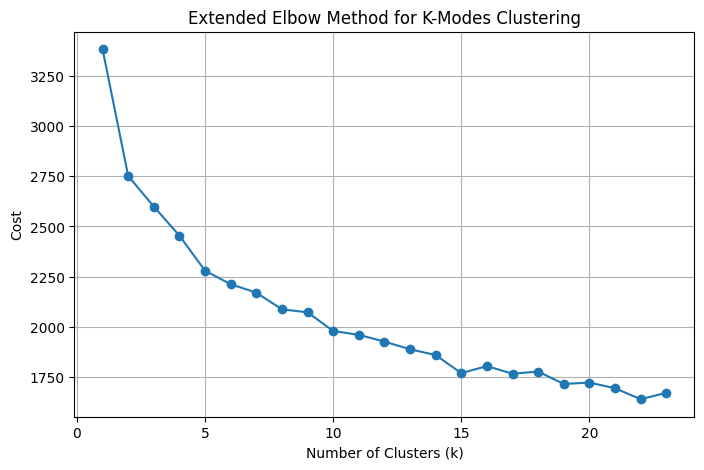

In [ ]:
# elbow plot (extended for plateau)
costs = []
K = range(1, 24)
for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit(X)
    costs.append(km.cost_)

plt.figure(figsize=(8, 5))
plt.plot(K, costs, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Extended Elbow Method for K-Modes Clustering')
plt.grid(True)
plt.show()

In [ ]:
# running cluster centroids using Kmodes with k = 4 (based on elbow plot)
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(X)

df['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 2468.0
Run 1, iteration: 2/100, moves: 80, cost: 2468.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 148, cost: 2412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 245, cost: 2441.0
Run 3, iteration: 2/100, moves: 93, cost: 2441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 186, cost: 2469.0
Run 4, iteration: 2/100, moves: 3, cost: 2469.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 232, cost: 2521.0
Run 5, iteration: 2/100, moves: 82, cost: 2521.0
Best run was number 2


In [ ]:
# interpreting clusters using mode
X = df.drop(columns=['Number of Doctors Visited','cluster'], errors='ignore')
modes = pd.DataFrame(km.cluster_centroids_, columns=X.columns)

modes.index = [f'Cluster {i}' for i in range(km.n_clusters)]

print(modes)

           Age  Phyiscal Health  Mental Health  Dental Health  \
Cluster 0  2.0              2.0            2.0            2.0   
Cluster 1  2.0              3.0            1.0            3.0   
Cluster 2  2.0              3.0            1.0            3.0   
Cluster 3  2.0              2.0            2.0            2.0   

           Stress Keeps Patient from Sleeping  \
Cluster 0                                 0.0   
Cluster 1                                 0.0   
Cluster 2                                 0.0   
Cluster 3                                 0.0   

           Medication Keeps Patient from Sleeping  \
Cluster 0                                     0.0   
Cluster 1                                     0.0   
Cluster 2                                     0.0   
Cluster 3                                     0.0   

           Pain Keeps Patient from Sleeping  \
Cluster 0                               0.0   
Cluster 1                               0.0   
Cluster 2            

In [ ]:
display(modes)

,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_1,Employment_4,Race_2,Race_3,Race_4,Race_5
Cluster 0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 1,2.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 2,2.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Cluster 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

cluster
0    228
1    204
2    150
3    132
Name: count, dtype: int64


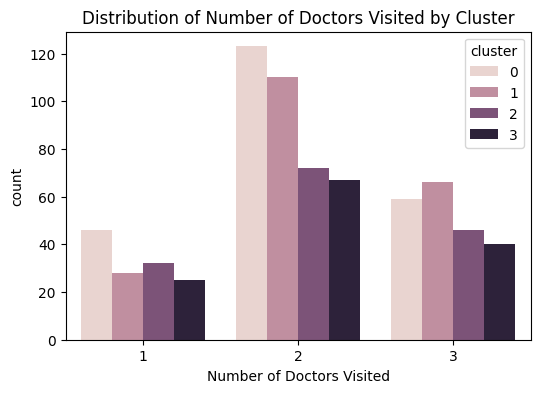

In [ ]:
# visualize response variable by cluster
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Number of Doctors Visited", hue = 'cluster')
plt.title("Distribution of Number of Doctors Visited by Cluster")
plt.show()

In [ ]:
# calculating key metrics (cost)
cost = km.cost_
print(cost)

2412.0


In [ ]:
# calculating key metrics (silhouette score using Hamming distance)
X_array = np.array(X)
s_score = silhouette_score(X_array, km.labels_, metric='hamming')
print(s_score)

0.10627934206095238
